In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",skiprows=1)

In [3]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [4]:
# to find null values in the data set
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
df.columns = df.columns.str.strip()
df[df['Classes'].isna()]

day month  year Temperature   RH   Ws Rain  \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN  NaN   
167                             14    07  2012          37   37   18  0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes  
122   NaN   NaN     NaN   NaN   NaN      NaN     NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire        NaN

In [6]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

In [7]:
Abbes_df =  df.iloc[124:]
Bejaia_df = df.iloc[0:122]

In [8]:
Abbes_df.reset_index(drop=True,inplace=True)

In [9]:
print(Abbes_df.isna().sum())
Abbes_df[Abbes_df['Classes'].isna()]

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64


day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
43  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

        FWI Classes  
43  fire        NaN

In [10]:
Abbes_df.dropna(inplace=True)

In [11]:
# changing the datatype only for Abbes rainforest dataset

for i in Abbes_df.columns:
    try:
        Abbes_df[i]=Abbes_df[i].astype(int)
    except:
        try:
            Abbes_df[i]=Abbes_df[i].astype(float)
        except:
            try:
                Abbes_df[i]=Abbes_df[i].astype(str)
            except exception as e:
                print(e)
            
            
# changing the datatype only for Bejaia rainforest dataset            
for i in Bejaia_df.columns:
    try:
        Bejaia_df[i]=Bejaia_df[i].astype(int)
    except:
        try:
            Bejaia_df[i]=Bejaia_df[i].astype(float)
        except:
            try:
                Bejaia_df[i]=Bejaia_df[i].astype(str)
            except exception as e:
                print(e)
            

In [12]:
Abbes_df['region'] = 1
Bejaia_df['region'] = 0

In [13]:
new_df = Abbes_df.append(Bejaia_df)

In [14]:
Abbes_df['DC']

0       8.2
1       7.8
2       7.6
3      15.4
4      17.6
       ... 
117    44.5
118     8.0
119     7.9
120    15.2
121    16.5
Name: DC, Length: 121, dtype: float64

In [15]:
for i in new_df.select_dtypes(include='object').columns.to_list():
    print("*"*30,end="\n")
    
    print(i,new_df[i].unique())

******************************
Classes ['not fire   ' 'fire   ' 'not fire     ' 'not fire    ' 'fire' 'fire '
 'not fire' 'not fire ']


In [16]:
new_df.select_dtypes(include='object').columns.to_list()

['Classes']

In [17]:
for column in new_df.columns:
    print(column,":", pd.api.types.infer_dtype(new_df[column]))

day : integer
month : integer
year : integer
Temperature : integer
RH : integer
Ws : integer
Rain : floating
FFMC : floating
DMC : floating
DC : floating
ISI : floating
BUI : floating
FWI : floating
Classes : string
region : integer


In [18]:
new_df['DC'] = pd.to_numeric(new_df['DC'],errors="ignore")

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 121
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int32(6), int64(1), object(1)
memory usage: 24.7+ KB


In [20]:
new_df.drop(columns = ['day','month',"year"],inplace=True)

In [21]:
x=[]
for i in new_df['Classes']:
    #print(i)
    try:
        x.append(i.strip())
    except:
        i="NA"
        x.append(i)
new_df['Classes'] = x

In [22]:
new_df['Classes'] = np.where(new_df['Classes']=='fire',1,0)

In [23]:
import plotly.express as px

fig = px.scatter(new_df,x='Temperature',y = "RH",color = 'Classes')
fig.show()

In [24]:
import plotly.express as px

fig = px.scatter(new_df,x='Temperature',y = "Rain",color = 'Classes')
fig.show()

In [25]:
import plotly.express as px

fig = px.scatter(new_df,x='region')
fig.show()

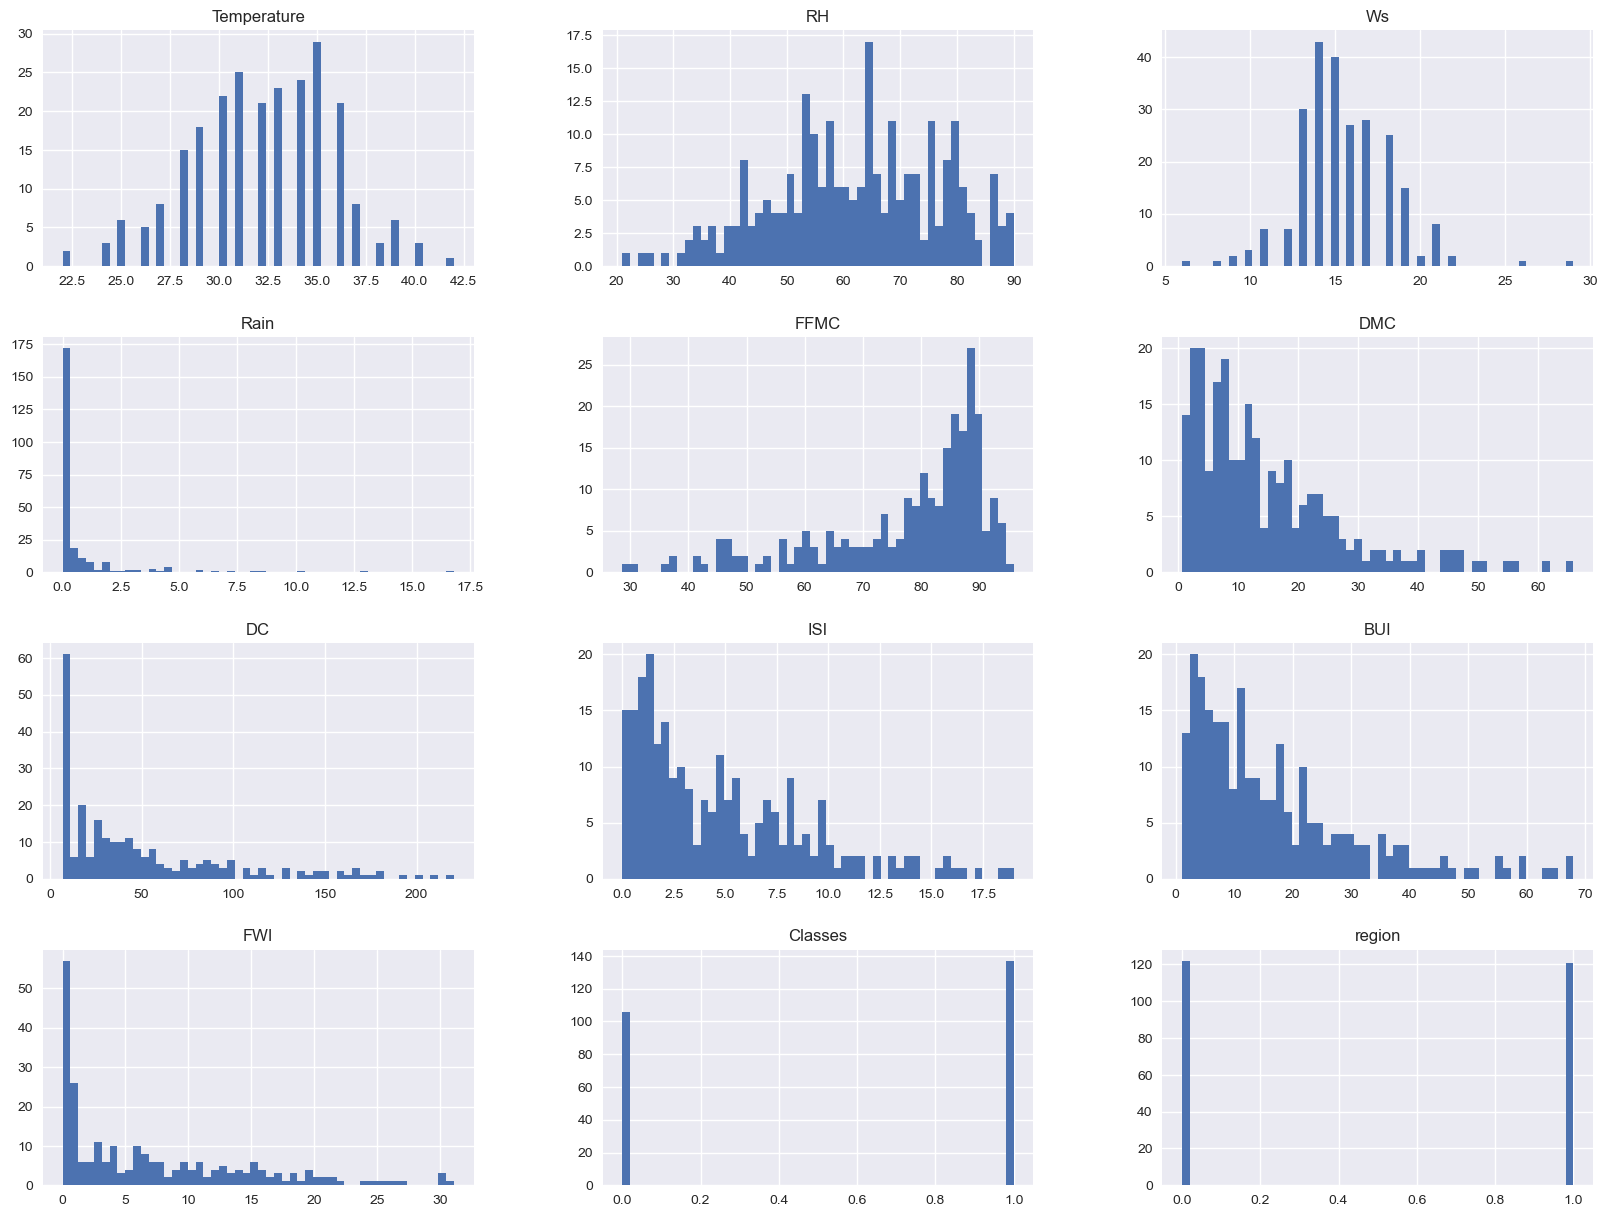

In [26]:
plt.style.use('seaborn')
new_df.hist(bins = 50, figsize = (20,15))
plt.show()

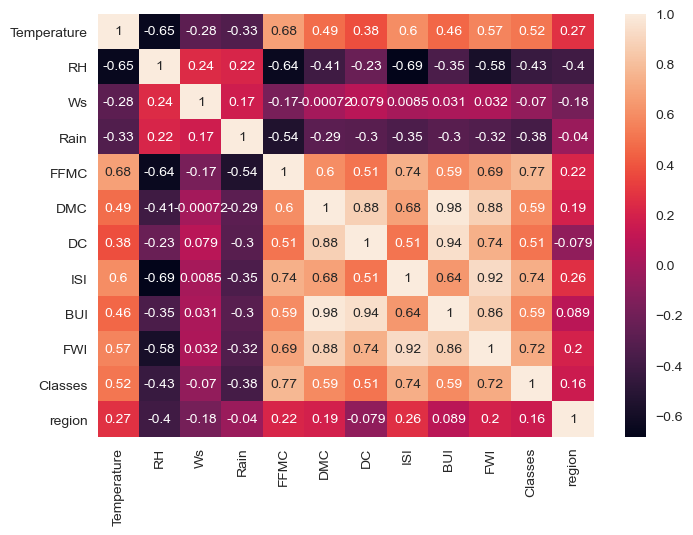

In [27]:
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [28]:
for i in new_df.columns:
    fig = px.box(new_df, y=i)
    fig.show()

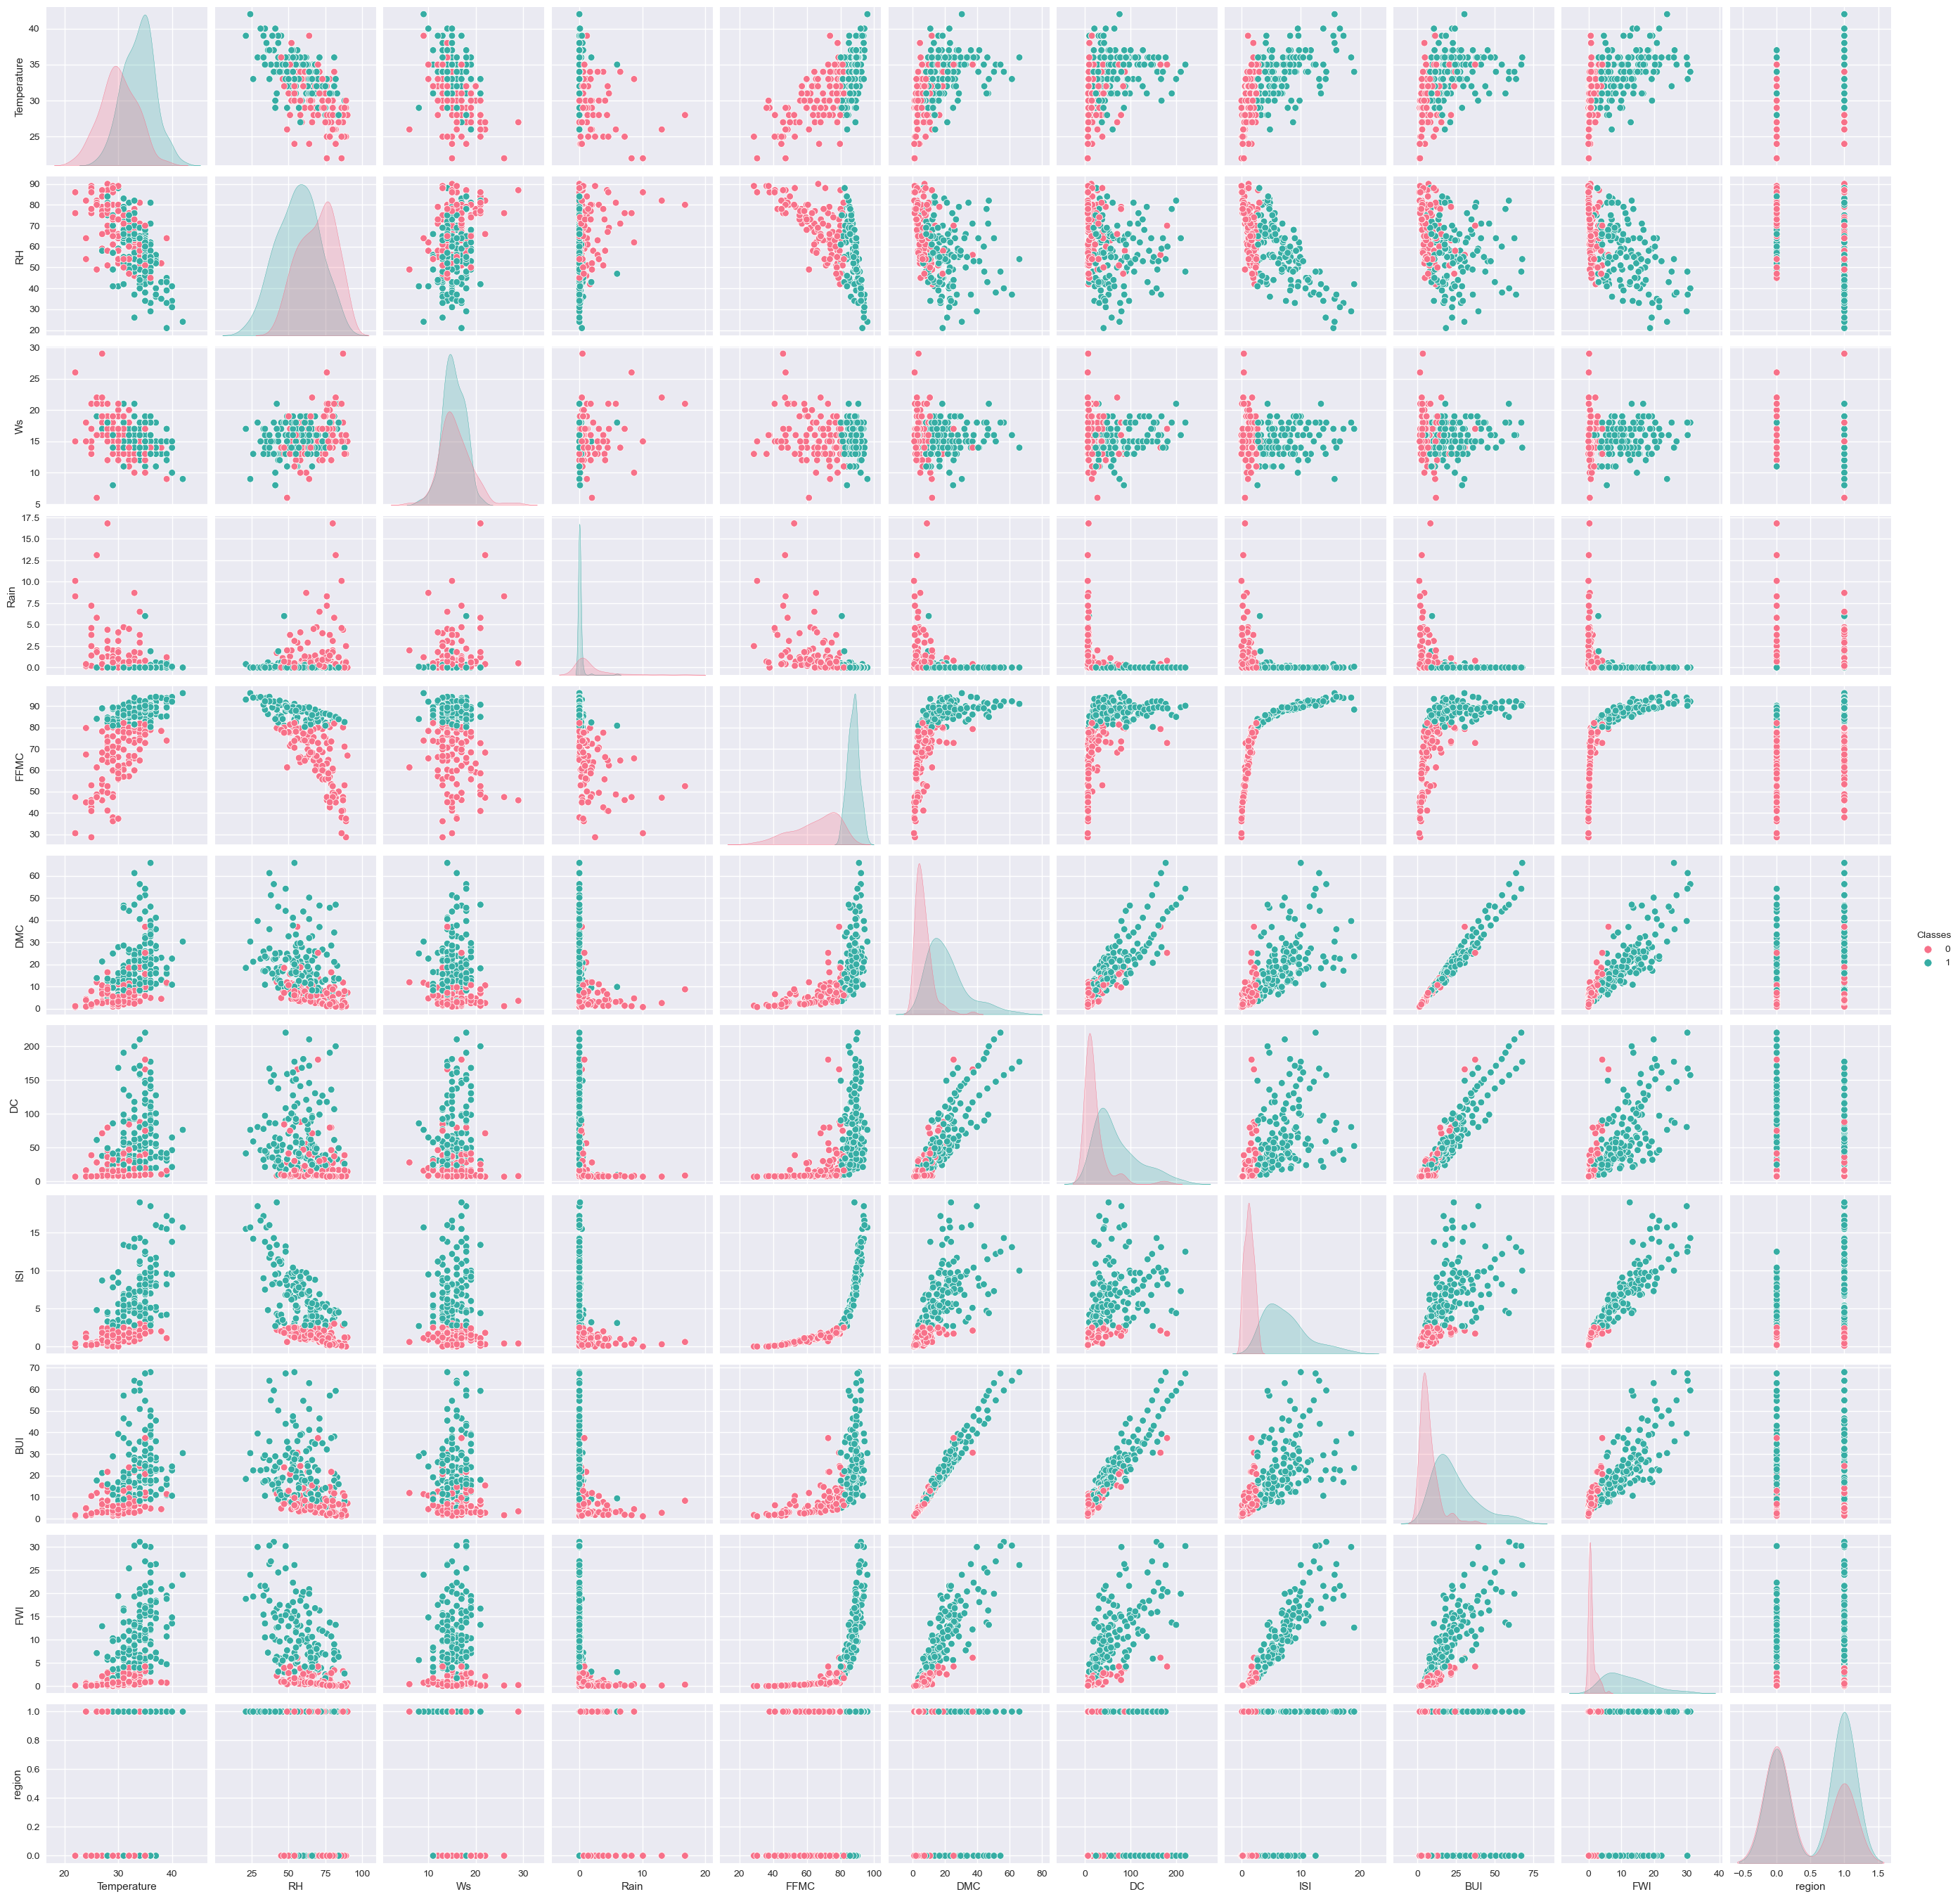

In [29]:
sns.pairplot(new_df,hue = 'Classes',palette= 'husl')
plt.show()

In [30]:
import plotly.express as px

fig = px.scatter(new_df,x='Temperature',y = "RH",color = 'Classes')
fig.show()

In [31]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.model_selection import train_test_split

In [56]:
new_df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region'],
      dtype='object')

In [57]:
X = new_df.drop(columns = ['Classes','region'])
y = new_df['Classes']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)

LogisticRegression()

In [61]:
print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [-0.4505355]
The coefficient b1=  [[-0.31384978 -0.01849817 -0.13254189  0.43586546  0.07289965 -0.26755904
   0.02168496  1.39383165 -0.07507759  1.92068367]]


In [62]:
y_pred= modelLogistic.predict(X_test)

In [63]:
#Creating confusion matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[30  0]
 [ 3 48]]


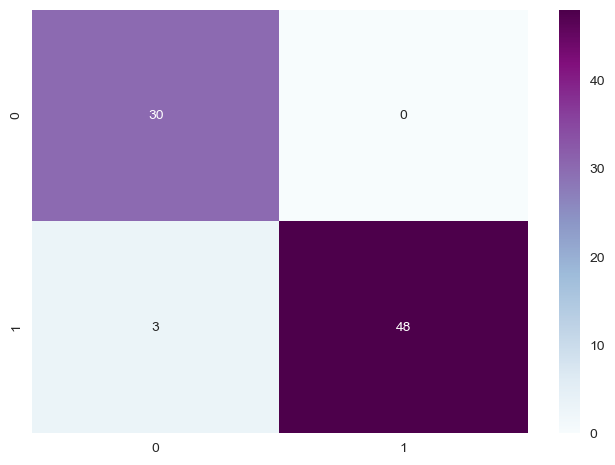

In [64]:
ax = sns.heatmap(ConfusionMatrix, annot=True, cmap="BuPu")
#ax.set_title("Confusion Matrix for admission predicition based on CET scorenn");
#ax.set_xlabel("nPrediction made for admission")
#ax.set_ylabel("Actual status of admission ")
## Ticket labels – List must be in alphabetical order

## Display the visualization of the Confusion Matrix.
plt.show()

In [65]:
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.9629629629629629


In [66]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

PerfectSeparationError: Perfect separation detected, results not available